In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [40]:
data = pd.read_csv('./wanted_result.csv', index_col = 0)

In [47]:
'10인이상' in data['이용하는기술스택/우대사항']

False

In [4]:
data.dropna(subset='업종분류', inplace = True)

In [48]:
data

,기업명,업종분류,사원수,설립연도,기업형태,매출액,주소,직무,자격요건,직급,이용하는기술스택/우대사항,해당 페이지 URL,기업 홈페이지 URL,수요
0,젭,데이터베이스 및 온라인정보 제공업,NaN,2021,NaN,NaN,서울특별시 강남구,소프트웨어 엔지니어,"프로그래밍언어,열정,성실",3,"멀티,쓰레드,분할,서버,웹,웹소켓,소켓,클라우드,구축,메타버스,AWS",https://www.wanted.co.kr/wd/180861,NaN,1
1,서커스컴퍼니,응용 소프트웨어 개발 및 공급업,20.0,2012,중소기업,170563.0,서울특별시 강남구,소프트웨어 엔지니어,"전공무관,Node,Net,Nginx,Apache,SystemDesign,MySQL,...",0,"소프트웨어,객체지향,빌드,배포,자동화,프로젝트,서버,아키텍처,버전관리,AWS,EC,...",https://www.wanted.co.kr/wd/207284,www.circuscompany.com,1
2,블로코,응용 소프트웨어 개발 및 공급업,29.0,2014,중소기업,118214.0,경기도 성남시 분당구,소프트웨어 엔지니어,"개발경력2년,대용량데이터,데이터,Golang",2,"블록,블록체인,체인,트랙트,프레임워크,개발경험,암호화,전자서명,클라우드,spring...",https://www.wanted.co.kr/wd/206690,ww.blocko.io,1
3,피매치,자연과학 및 공학 융합 연구개발업,NaN,2021,NaN,5286.0,서울특별시 성북구,소프트웨어 엔지니어,"서비스개발,데이터,딥러닝프레임워크,AI,Python,Tensorflow,Pytorch",2,"헬스,헬스케어,자연어,모델,영문,논문,분석,LLM,Linux,Docker",https://www.wanted.co.kr/wd/186806,www.pmatch.co.kr,1
4,만나플래닛,응용 소프트웨어 개발 및 공급업,134.0,2016,중소기업,1419493.0,서울특별시 구로구,소프트웨어 엔지니어,JAVA,5,"협업,프레임워크,트렌드,Rest API,API,Git,redmine",https://www.wanted.co.kr/wd/206244,www.manna-planet.com,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,무신사,전자상거래 소매업,1354.0,2012,중견기업,64516211.0,서울특별시 성동구,BI 엔지니어,"해당경력5년,업무능력보유,데이터,파이프,파이프라인설계,프로그래밍경험,중급,중급이상,...",5,"프로덕트,클라우드,데이터,인프라,구축,시각화,툴,프로세싱,분석,모델링,도출,Apac...",https://www.wanted.co.kr/wd/180361,www.musinsa.com,1
1957,인센드,응용 소프트웨어 개발 및 공급업,NaN,2023,NaN,NaN,경기도 성남시 분당구,BI 엔지니어,"경력8년이상,창의성,협동심,도전,도전정신",8,"리더쉽,능력,Full Stack",https://www.wanted.co.kr/wd/195532,NaN,1
1958,큐픽스,컴퓨터 프로그래밍 서비스업,59.0,2015,중소기업,280419.0,경기도 성남시 분당구,루비온레일즈 개발자,"석사,석사학위이상,학위,2년이상경력자,실력보유자,전문,전문연구요원,연구,병역,병역특...",2,"클라우드,웹,웹서비스,구축,고민해본,모니터링,탐지,해결,대규모,트래픽,글로벌,자동화...",https://www.wanted.co.kr/wd/207738,www.cupix.com,1
1959,엔비티,광고매체 판매업,77.0,2012,중소기업,10251976.0,서울특별시 서초구,루비온레일즈 개발자,"백엔드개발,운영실무6년,이해도,외부서비스,조직이제공,내부시스템,트래픽,트래픽서비스,...",6,"모바일,광고,서버,비즈니스,클라우드,AdTech,Ruby on Rails,Sprin...",https://www.wanted.co.kr/wd/177555,www.nbt.com,1


In [49]:
data.업종분류.value_counts().median()

4.0

In [50]:
data.업종분류.value_counts() > 4

업종분류
응용 소프트웨어 개발 및 공급업                True
시스템 소프트웨어 개발 및 공급업               True
데이터베이스 및 온라인정보 제공업               True
전자상거래 소매업                        True
포털 및 기타 인터넷 정보매개 서비스업            True
                                ...  
그 외 기타 건축자재 도매업                 False
영화, 비디오물 및 방송프로그램 제작 관련 서비스업    False
상품 종합 도매업                       False
기타 전문 서비스업                      False
검퓨터시스템 통합 자문 및 구축 서비스업          False
Name: count, Length: 125, dtype: bool

In [51]:
data['수요'] = data['업종분류'].apply(lambda x: 1 if data['업종분류'].value_counts()[x] > 4 else 0)

In [52]:
data.수요.value_counts()

수요
1    1764
0     168
Name: count, dtype: int64

In [53]:
data.isna().sum()

기업명                0
업종분류               0
사원수              961
설립연도               0
기업형태             837
매출액              162
주소                 0
직무                 0
자격요건              18
직급                 0
이용하는기술스택/우대사항      7
해당 페이지 URL         0
기업 홈페이지 URL       22
수요                 0
dtype: int64

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


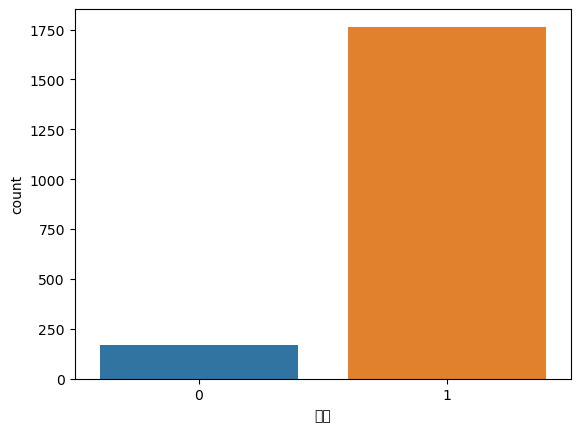

In [54]:
sns.countplot(x = data['수요']);

In [167]:
data.reset_index(drop = True ,inplace= True )
data.drop_duplicates(inplace = True)

In [168]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import statsmodels.api as sm
    
# 기업명	업종분류	사원수	설립연도	기업형태	매출액	주소	직무	자격요건	직급	이용하는기술스택/우대사항	해당 페이지 URL	기업 홈페이지 URL	수요

# 데이터 준비
X = data.drop(columns=['기업명', '업종분류', '사원수', '설립연도', '매출액', '자격요건', '해당 페이지 URL', '기업 홈페이지 URL', '수요'])
y = data['수요']

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 수치형 변수와 범주형 변수 선택
numeric_features = X[['직급']].columns
categorical_features = X[['기업형태', '주소', '직무', '직급', '이용하는기술스택/우대사항']].columns

# Pipeline 설정
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# 전처리된 설명변수들을 구하기
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 로지스틱 회귀 모델 학습
logreg_model = LogisticRegression()
logreg_model.fit(X_train_processed, y_train)

# 테스트 데이터로 예측
y_pred = logreg_model.predict(X_test_processed)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9216216216216216
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.06      0.12        31
           1       0.92      1.00      0.96       339

    accuracy                           0.92       370
   macro avg       0.96      0.53      0.54       370
weighted avg       0.93      0.92      0.89       370



In [169]:
# 전처리된 설명변수들을 구하기
X_train_processed = preprocessor.fit_transform(X)

# ColumnTransformer에서 변환된 각 특성의 이름을 가져와서 컬럼 이름으로 사용
column_names = ['const'] + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist() + numeric_features.tolist()

# 출력하여 확인
print("Column names:", column_names)
print("Shape of transformed DataFrame:", X_train_processed.shape)

Column names: ['const', '기업형태_대기업', '기업형태_소기업', '기업형태_중견기업', '기업형태_중소기업', '기업형태_nan', '주소_강원도 인제군', '주소_강원도 춘천시', '주소_경기도 고양시 일산동구', '주소_경기도 고양시 일산서구', '주소_경기도 과천시', '주소_경기도 광명시', '주소_경기도 군포시', '주소_경기도 군포시 당동', '주소_경기도 남양주시', '주소_경기도 성남시 분당구', '주소_경기도 성남시 수정구', '주소_경기도 성남시 중원구', '주소_경기도 수원시 영통구', '주소_경기도 안양시 동안구', '주소_경기도 용인시 수지구', '주소_경기도 화성시', '주소_경상남도 김해시', '주소_경상남도 창원시', '주소_경상북도 경산시', '주소_경상북도 포항시 남구', '주소_고양시 덕양구', '주소_광주광역시 동구', '주소_대구광역시 남구', '주소_대구광역시 달성군', '주소_대구광역시 동구', '주소_대구광역시 수성구', '주소_대구광역시 중구', '주소_대전광역시 서구', '주소_대전광역시 유성구', '주소_대전광역시 중구', '주소_부산 광역시 해운대구', '주소_부산광역시 동구', '주소_부산광역시 연제구', '주소_부산광역시 해운대구', '주소_서울득별시 서울특별시 영등포구', '주소_서울특별시 강남구', '주소_서울특별시 강동구', '주소_서울특별시 강서구', '주소_서울특별시 관악구', '주소_서울특별시 광진구', '주소_서울특별시 구로구', '주소_서울특별시 금천구', '주소_서울특별시 동대문구', '주소_서울특별시 동작구', '주소_서울특별시 마포구', '주소_서울특별시 서대문구', '주소_서울특별시 서초구', '주소_서울특별시 성동구', '주소_서울특별시 성북구', '주소_서울특별시 송파구', '주소_서울특별시 영등포구', '주소_서울특별시 용산구', '주소_서울특별시 종로구', '주소_서울특별시 중구', '주소_서을특별시 서울특별시 마포구', '주소_세종시 나성동', '주소_울산

### 1. feature에 비해 인덱스가 적어 유의미한 결과를 얻기 힘듦 (1850, 1019)
### 2. 모델이 0을 예측할 확률이 낮은 수치인 6%